In [1]:
#Import libraries
#Data manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
# Machine Learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('data.csv')
df

,title,description,authors,publisher,publishedDate,genres,ratingsCount
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],NaN
1,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion'],NaN
2,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],NaN
3,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],5.0
4,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],Tan Books & Pub,2009-01-01,['Biography & Autobiography'],NaN
...,...,...,...,...,...,...,...
146868,The Magic of the Soul: Applying Spiritual Powe...,"""The Magic of the Soul, Applying Spiritual Pow...",['Patrick J. Harbula'],NaN,2002-09-01,"['Body, Mind & Spirit']",NaN
146869,Autodesk Inventor 10 Essentials Plus,Autodesk Inventor 2017 Essentials Plus provide...,"['Daniel Banach', 'Travis Jones']",SDC Publications,2016-03,['Computers'],NaN
146870,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],Scholastic Paperbacks,2000-06-01,['Juvenile Fiction'],2.0
146871,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],Vintage,2003-08-12,['Fiction'],19.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146873 entries, 0 to 146872
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   title          146873 non-null  object 
 1   description    137352 non-null  object 
 2   authors        146873 non-null  object 
 3   publisher      132040 non-null  object 
 4   publishedDate  146496 non-null  object 
 5   genres         144086 non-null  object 
 6   ratingsCount   44722 non-null   float64
dtypes: float64(1), object(6)
memory usage: 7.8+ MB


In [10]:
df.describe()

,ratingsCount
count,14131.000000
mean,34.323402
std,241.833297
min,1.000000
25%,1.000000
50%,4.000000
75%,11.000000
max,4895.000000


In [11]:
df.shape

(14131, 7)

In [12]:
df.isnull().sum() #before removal missing value


title            0
description      0
authors          0
publisher        0
publishedDate    0
genres           0
ratingsCount     0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum() #after remove missing value

title            0
description      0
authors          0
publisher        0
publishedDate    0
genres           0
ratingsCount     0
dtype: int64

In [15]:
# Select top 2 most frequent genres
top_genres = df['genres'].value_counts().nlargest(2).index
# Keep only books belonging to these top genres
df = df[df['genres'].isin(top_genres)]
# Check the distribution of remaining genres
df['genres'].value_counts()

genres
['Fiction']             10867
['Juvenile Fiction']     3264
Name: count, dtype: int64

In [16]:
df['publishedYear'] = pd.to_datetime(df['publishedDate'], errors='coerce').dt.year

In [17]:
df['publishedYear'] = df['publishedYear'].fillna(df['publishedYear'].median())
df['ratingsCount'] = df['ratingsCount'].fillna(df['ratingsCount'].median())

df.isnull().sum()


title            0
description      0
authors          0
publisher        0
publishedDate    0
genres           0
ratingsCount     0
publishedYear    0
dtype: int64

In [18]:
#importing Libraries
from sklearn.preprocessing import LabelEncoder

In [19]:
#Encode genres as numbers
le = LabelEncoder()
df['genres'] = le.fit_transform(df['genres'])


In [20]:
#define feature(X) and label(y)
X = df[['ratingsCount', 'publishedYear']]
y = df['genres']

In [21]:
#split dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Create unfitted model
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [23]:
# Fit model on training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [24]:
#predict and evaluate KNN
from sklearn.metrics import accuracy_score
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.7591085956844712


In [25]:
from sklearn.model_selection import GridSearchCV


In [26]:
#Define values to try
param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}


In [27]:
#Apply Hyperparameter Tuning
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5
)

grid_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [28]:
print("Best K value:", grid_knn.best_params_)


Best K value: {'n_neighbors': 9}


In [29]:
# Final KNN model using best K
best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Tuned KNN Accuracy:", accuracy_knn)


Tuned KNN Accuracy: 0.7598160594269544


In [30]:
#  USER INPUT 
# Example: ratingsCount = 1500, publishedYear = 2018
user_input = [[1500, 2018]]


In [31]:
# Correct user input format (with feature names)
user_input = pd.DataFrame([[1500, 2018]], columns=['ratingsCount', 'publishedYear'])


In [32]:
knn_output = best_knn.predict(user_input)
print("KNN Output (Predicted Genre):", le.inverse_transform(knn_output)[0])


KNN Output (Predicted Genre): ['Fiction']


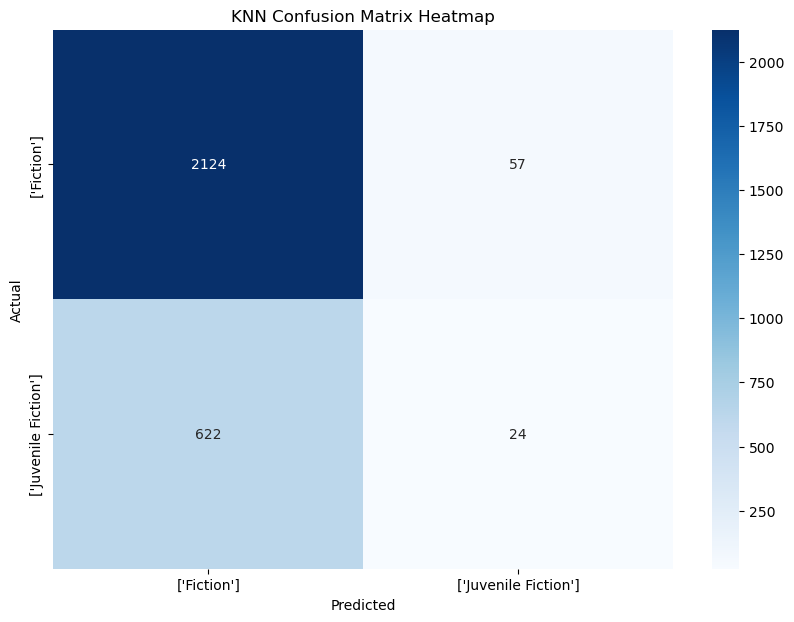

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("KNN Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

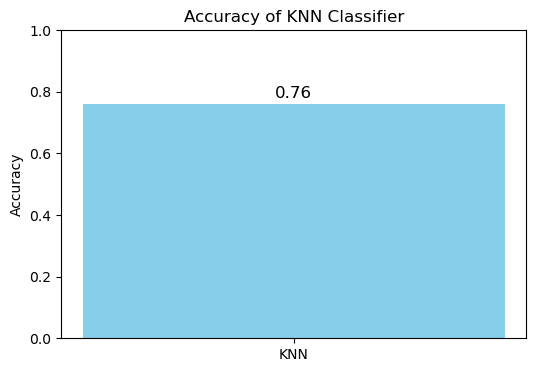

In [34]:
import matplotlib.pyplot as plt

# Accuracy of KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Plotting
plt.figure(figsize=(6,4))
plt.bar(['KNN'], [knn_accuracy], color='skyblue')
plt.ylim(0, 1)  # scale 0-1
plt.ylabel("Accuracy")
plt.title("Accuracy of KNN Classifier")
plt.text(0, knn_accuracy + 0.02, f"{knn_accuracy:.2f}", ha='center', fontsize=12)
plt.show()


In [35]:
#importing naive bayes model
from sklearn.naive_bayes import GaussianNB
# Create unfitted model
gnb = GaussianNB() 
gnb

GaussianNB()

In [36]:
# Fit model on training data
gnb.fit(X_train, y_train)


GaussianNB()

In [37]:
#predict and evaluate NAIVE BAYES
from sklearn.metrics import accuracy_score
y_pred_nb = gnb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.7640608418818535


In [38]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter values to try
param_grid_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}


In [39]:
#Apply Hyperparameter Tuning
grid_nb = GridSearchCV(
    GaussianNB(),
    param_grid_nb,
    cv=5  # 5-fold cross-validation
)

grid_nb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]})

In [40]:
#See the best parameter
print("Best Naive Bayes Parameter:", grid_nb.best_params_)


Best Naive Bayes Parameter: {'var_smoothing': 1e-07}


In [41]:
#Final Naive Bayes model using best var_smoothing
best_nb = grid_nb.best_estimator_

# Predict on test data
y_pred_nb = best_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Tuned Naive Bayes Accuracy:", accuracy_nb)


Tuned Naive Bayes Accuracy: 0.7640608418818535


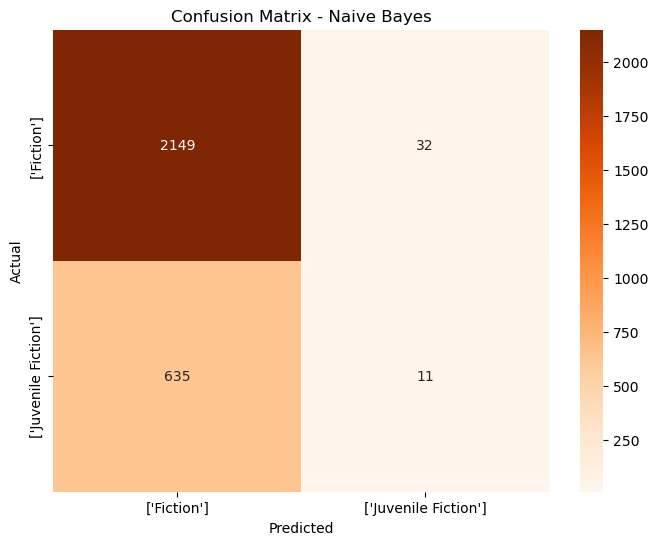

In [42]:
#Create Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [43]:
# USER INPUT 
user_input = pd.DataFrame(
    [[1500, 2018]],
    columns=['ratingsCount','publishedYear']
)

# Predict genre
nb_output = best_nb.predict(user_input)
print("Naive Bayes Output (Predicted Genre):", le.inverse_transform(nb_output)[0])


Naive Bayes Output (Predicted Genre): ['Juvenile Fiction']


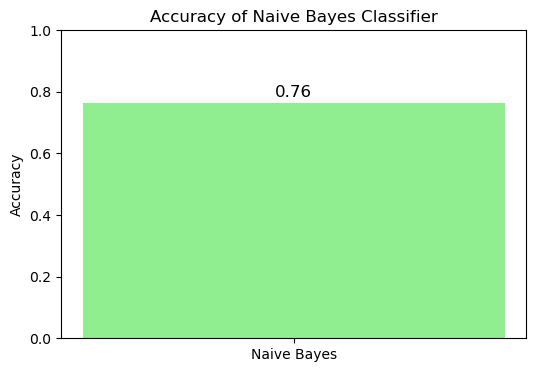

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Plotting
plt.figure(figsize=(6,4))
plt.bar(['Naive Bayes'], [nb_accuracy], color='lightgreen')
plt.ylim(0, 1)  # scale 0-1
plt.ylabel("Accuracy")
plt.title("Accuracy of Naive Bayes Classifier")
plt.text(0, nb_accuracy + 0.02, f"{nb_accuracy:.2f}", ha='center', fontsize=12)
plt.show()

In [45]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Create unfitted model
dt = DecisionTreeClassifier(random_state=42)
dt

DecisionTreeClassifier(random_state=42)

In [46]:
# Fit model
dt.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

In [47]:
#predict and evaluate Decision Tree Classifier
from sklearn.metrics import accuracy_score
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.7672444287230279


In [48]:
from sklearn.model_selection import GridSearchCV


In [49]:
# Define hyperparameters to tune
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],           # maximum depth of tree
    'min_samples_split': [2, 5, 10],          # minimum samples to split a node
    'criterion': ['gini', 'entropy']          # function to measure quality of split
}


In [50]:
# Apply GridSearchCV
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,   # 5-fold cross-validation
    scoring='accuracy'
)

grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [51]:
# Step 4: See best hyperparameters
print("Best Decision Tree Parameters:", grid_dt.best_params_)


Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [52]:
#Use best Decision Tree model
best_dt = grid_dt.best_estimator_

# Predict on test data
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Tuned Decision Tree Accuracy:", accuracy_dt)


Tuned Decision Tree Accuracy: 0.7658295012380616


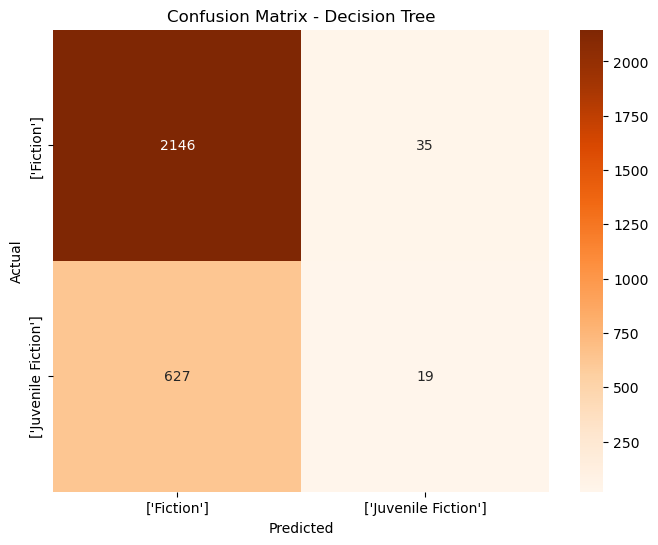

In [53]:
#Create Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [54]:
#  USER INPUT 
user_input = pd.DataFrame(
    [[1500, 2018]],  # Example: ratingsCount=1500, publishedYear=2018
    columns=['ratingsCount','publishedYear']
)

# Predict genre
dt_output = best_dt.predict(user_input)
print("Decision Tree Output (Predicted Genre):", le.inverse_transform(dt_output)[0])


Decision Tree Output (Predicted Genre): ['Juvenile Fiction']


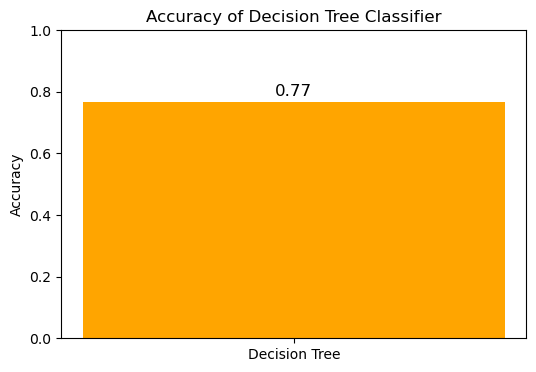

In [55]:
# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Plotting
plt.figure(figsize=(6,4))
plt.bar(['Decision Tree'], [dt_accuracy], color='orange')
plt.ylim(0, 1)  # scale 0-1
plt.ylabel("Accuracy")
plt.title("Accuracy of Decision Tree Classifier")
plt.text(0, dt_accuracy + 0.02, f"{dt_accuracy:.2f}", ha='center', fontsize=12)
plt.show()


In [56]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Create model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  
rf

RandomForestClassifier(random_state=42)

In [57]:
# Fit model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [58]:
#predict and evaluate Random Forest Classifier
from sklearn.metrics import accuracy_score
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7633533781393703


In [59]:
from sklearn.model_selection import GridSearchCV


In [60]:
# Define hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 150],         # number of trees
    'max_depth': [None, 10, 20],            # max depth of each tree
    'min_samples_split': [2, 5],            # min samples to split a node
    'criterion': ['gini', 'entropy']        # splitting criterion
}


In [61]:
#  Apply GridSearchCV
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,          # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1      # use all CPU cores
)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [62]:
#Best Random Forest parameters
print("Best Random Forest Parameters:", grid_rf.best_params_)


Best Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [63]:
# Use best Random Forest model
best_rf = grid_rf.best_estimator_

# Predict on test data
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Tuned Random Forest Accuracy:", accuracy_rf)


Tuned Random Forest Accuracy: 0.7651220374955784


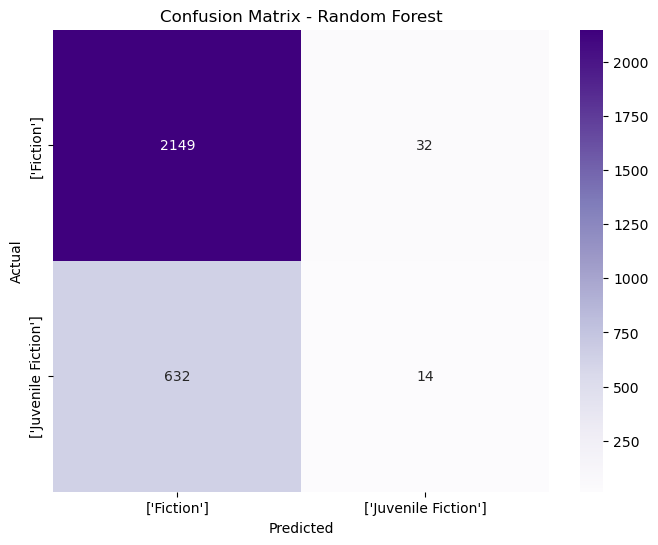

In [64]:
#Create Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [120]:
# USER INPUT
user_input = pd.DataFrame(
    [[1500, 2018]],  # Example: ratingsCount=1500, publishedYear=2018
    columns=['ratingsCount','publishedYear']
)

# Predict genre
rf_output = best_rf.predict(user_input)
print("Random Forest Output (Predicted Genre):", le.inverse_transform(rf_output)[0])


Random Forest Output (Predicted Genre): ['Fiction']


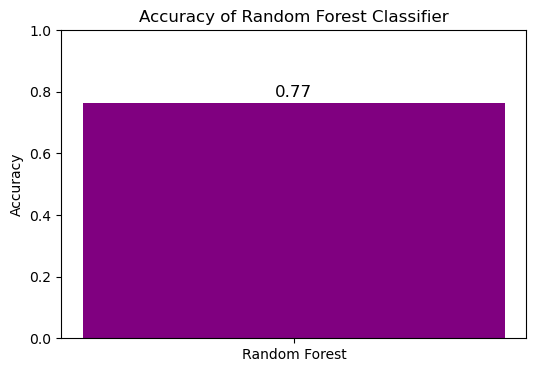

In [65]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Plotting
plt.figure(figsize=(6,4))
plt.bar(['Random Forest'], [rf_accuracy], color='purple')
plt.ylim(0, 1)  # scale 0-1
plt.ylabel("Accuracy")
plt.title("Accuracy of Random Forest Classifier")
plt.text(0, rf_accuracy + 0.02, f"{rf_accuracy:.2f}", ha='center', fontsize=12)
plt.show()

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame of classifier accuracies
accuracy_df = pd.DataFrame({
    'Classifier': ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf)]
})

# Set the classifier column as index for heatmap
accuracy_df.set_index('Classifier', inplace=True)
accuracy_df


,Accuracy
Classifier,
KNN,0.759816
Naive Bayes,0.764061
Decision Tree,0.765830
Random Forest,0.765122


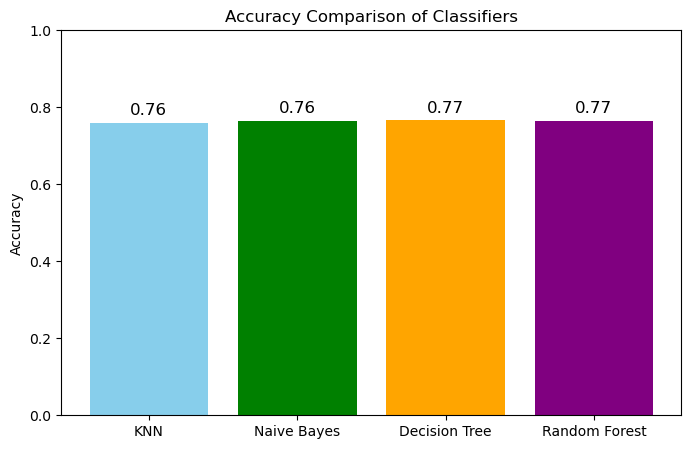

In [69]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [accuracy_score(y_test, y_pred_knn),
              accuracy_score(y_test, y_pred_nb),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_rf)]

# Classifier names
classifiers = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']

# Plotting
plt.figure(figsize=(8,5))
plt.bar(classifiers, accuracies, color=['skyblue', 'green', 'orange', 'purple'])
plt.ylim(0, 1)  # scale 0-1
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classifiers")

# Add text labels on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.show()